In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage import measure
from skimage.color import rgb2grey

from dolfin import *
from mshr import *

289


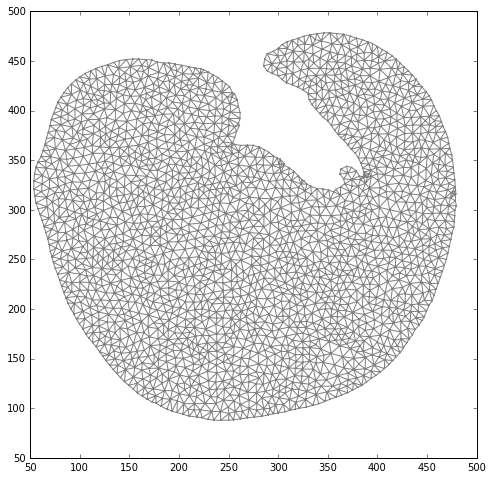

In [2]:
def mesh_from_image(path, n=32, o=1, l=0.8):

    r = rgb2grey(mpimg.imread(path))

    # Find contours at a constant value of 0.8
    contours = measure.find_contours(r, l)

    # Select the biggest contour
    max_contour = sorted(contours, key=lambda x:len(x), reverse=True)[0]

    max_contour = max_contour[::8*o]
    # Generate the mesh
    domain_vertices = [Point(x,y) for x,y in max_contour]
    
    geometry = Polygon(max_contour)
    mesh = generate_mesh(geometry,n)
    return mesh, domain_vertices

mesh, domain_vertices = mesh_from_image('embrio.jpg', o=-1, l=0.1)

plt.figure(figsize=(8,8))
plot(mesh)

Discrete space size: 2197
0.00161932930197 0.0


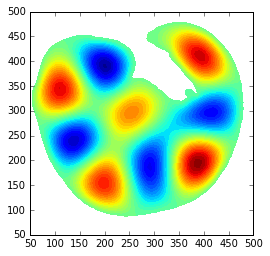

In [3]:
k = 10 #Which eigenfuncion should we plot, in order of smallest magnitude eigenvalue

V = FunctionSpace(mesh, 'Lagrange', 1)
bc = DirichletBC(V, 0.0, DomainBoundary())
u, v = TrialFunction(V), TestFunction(V)

a = inner(grad(u), grad(v))*dx
L = Constant(0.0)*v*dx
m = u*v*dx

A, _ = assemble_system(a, L, bc)
B = assemble(m)

print "Discrete space size: %d"%V.dim()
eigensolver = SLEPcEigenSolver(as_backend_type(A), as_backend_type(B))
#prm = eigensolver.parameters
#info(prm, True)
eigensolver.parameters['spectrum'] = 'smallest magnitude'

eigensolver.solve(200)
eig = Function(V)
eig_vec = eig.vector()

r, c, rx, cx = eigensolver.get_eigenpair(k)
eig_vec[:] = rx
print r, c
plt.figure()
plot(eig)

340


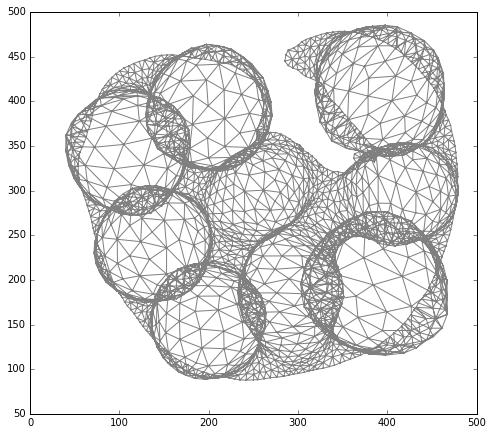

In [4]:
eigenvalues = []

# The gradient must be defined in a vector space

V_vec = VectorFunctionSpace(mesh, "CG", 1)
gradu = project(grad(eig*eig),V_vec)

# Moving every point by the gradient

for i in range(len(mesh.coordinates())):
    p = mesh.coordinates()[i]
    mesh.coordinates()[i] -= (600000*gradu(p))

# Saving the EigenValues
    
eigenvalues_parc = []
for n in range(150):
    r, c, rx, cx = eigensolver.get_eigenpair(n)
    eigenvalues_parc.append(r)
eigenvalues.append(eigenvalues_parc)

# Plotting the new mesh

plt.figure(figsize=(8,8))
plot(mesh)
plt.savefig('newmesh.jpg')

mesh = mesh_from_image('newmesh.jpg', o=1, l=0.8)

Discrete space size: 1924
0.000922182269055 0.0


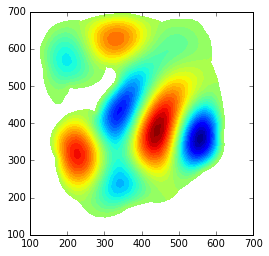

In [5]:
# Calculate the new eigenfunctions

k = 10 #Which eigenfuncion should we plot, in order of smallest magnitude eigenvalue

V = FunctionSpace(mesh, 'Lagrange', 1)
bc = DirichletBC(V, 0.0, DomainBoundary())
u, v = TrialFunction(V), TestFunction(V)

a = inner(grad(u), grad(v))*dx
L = Constant(0.0)*v*dx
m = u*v*dx

A, _ = assemble_system(a, L, bc)
B = assemble(m)

print "Discrete space size: %d"%V.dim()
eigensolver = SLEPcEigenSolver(as_backend_type(A), as_backend_type(B))
#prm = eigensolver.parameters
#info(prm, True)
eigensolver.parameters['spectrum'] = 'smallest magnitude'

eigensolver.solve(200)
eig = Function(V)
eig_vec = eig.vector()

r, c, rx, cx = eigensolver.get_eigenpair(k)
eig_vec[:] = rx
print r, c
plt.figure()
plot(eig)

289
Discrete space size: 2197
0.00161932930197 0.0
0
340
1
363
2
327
3
344


RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to create polygon.
*** Reason:  Polygon vertices must be given in counter clockwise order.
*** Where:   This error was encountered inside CSGPrimitives2D.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2017.2.0
*** Git changeset:  unknown
*** -------------------------------------------------------------------------


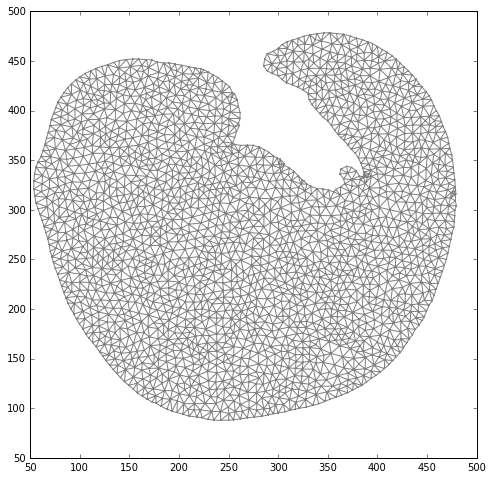

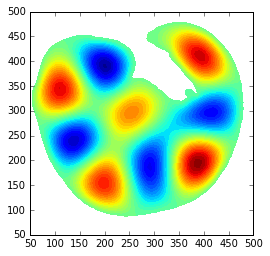

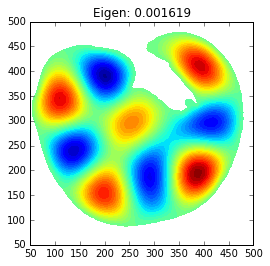

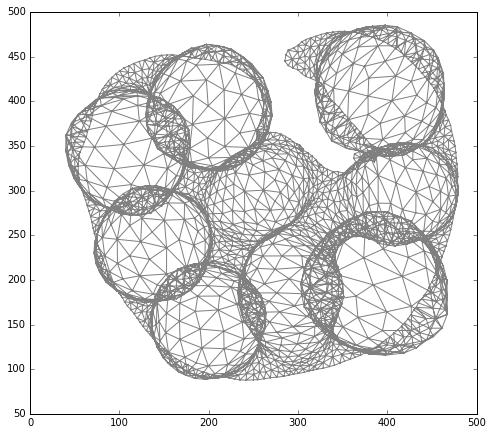

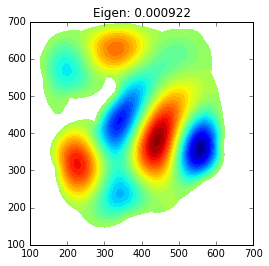

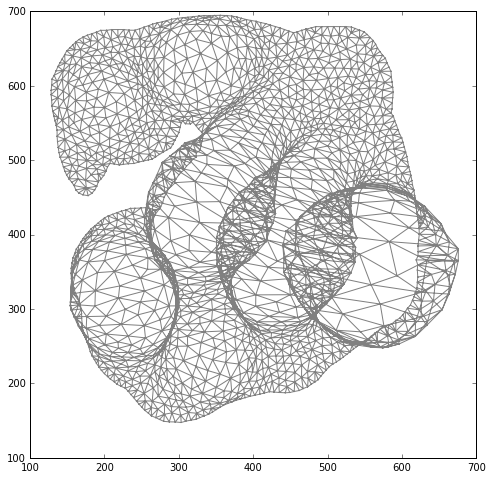

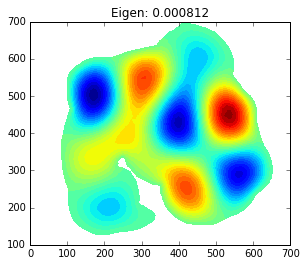

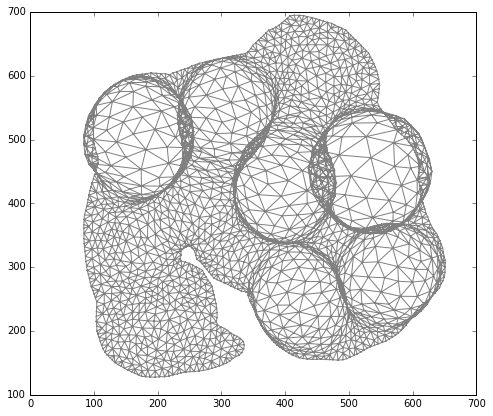

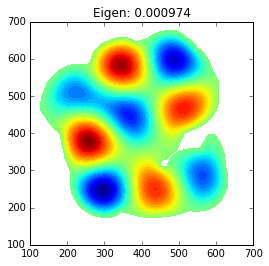

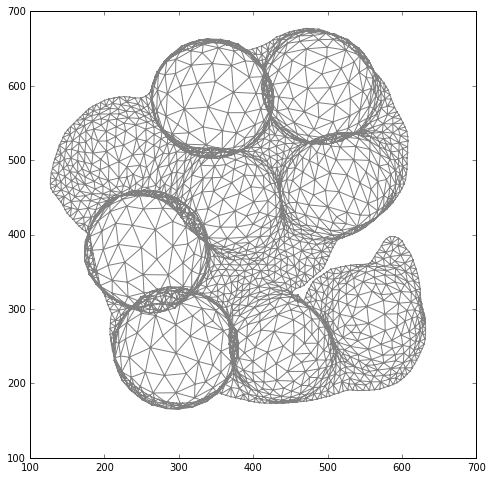

In [6]:
# The next code is a loop version of the previous. But in some iteration it will fail because the code will not able to
# determine the shape of the mesh.

mesh, domain_vertices = mesh_from_image('embrio.jpg', o=-1, l=0.1)

plt.figure(figsize=(8,8))
plot(mesh)

eigenvalues = []

for j in range(10):
    print j
    k = 10 #Which eigenfuncion should we plot, in order of smallest magnitude eigenvalue

    V = FunctionSpace(mesh, 'Lagrange', 1)
    bc = DirichletBC(V, 0.0, DomainBoundary())
    u, v = TrialFunction(V), TestFunction(V)

    a = inner(grad(u), grad(v))*dx
    L = Constant(0.0)*v*dx
    m = u*v*dx

    A, _ = assemble_system(a, L, bc)
    B = assemble(m)

    eigensolver = SLEPcEigenSolver(as_backend_type(A), as_backend_type(B))
    #prm = eigensolver.parameters
    #info(prm, True)
    eigensolver.parameters['spectrum'] = 'smallest magnitude'

    eigensolver.solve(200)
    eig = Function(V)
    eig_vec = eig.vector()

    r, c, rx, cx = eigensolver.get_eigenpair(k)
    eig_vec[:] = rx
    plt.figure()
    plot(eig)
    plt.title('Eigen: %s'%round(r, 6))
    plt.savefig('NewMeshEigen/Embrio%d.png'%j)
    
    V_vec = VectorFunctionSpace(mesh, "CG", 1)
    gradu = project(grad(eig*eig),V_vec)

    for i in range(len(mesh.coordinates())):
        p = mesh.coordinates()[i]
        mesh.coordinates()[i] -= (600000*gradu(p))
    
    eigenvalues_parc = []
    for n in range(150):
        r, c, rx, cx = eigensolver.get_eigenpair(n)
        eigenvalues_parc.append(r)
    eigenvalues.append(eigenvalues_parc)

    

    plt.figure(figsize=(8,8))
    plot(mesh)
    plt.savefig('newmesh.jpg')
    
    mesh, domain_vertices = mesh_from_image('newmesh.jpg', o=1, l=0.8)

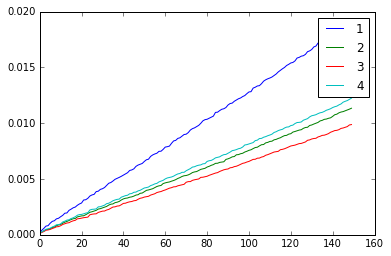

In [7]:
# We can still plot some results

plt.plot(np.array(list(range(150))), np.array(eigenvalues[0]))
plt.plot(np.array(list(range(150))), np.array(eigenvalues[1]))
plt.plot(np.array(list(range(150))), np.array(eigenvalues[2]))
plt.plot(np.array(list(range(150))), np.array(eigenvalues[3]))
plt.legend(['1', '2', '3', '4'])
plt.show()